#  Student Placement Prediction

**Objective:** Predict whether a student will be placed or not based on academic and skill-related features.

**Dataset:** 10,000 student records with 12 features

**Success Criteria:** Achieve >60% accuracy

---

# Phase 1: Data Loading & Initial Exploration

In this phase, we will:
- Import necessary libraries
- Load the dataset
- Understand the structure and data types
- Check for missing values and duplicates
- Get statistical summary

## 1.1 Import Libraries

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print(" Libraries imported successfully!")

 Libraries imported successfully!


## 1.2 Load Dataset

In [2]:
# Load the placement dataset
df = pd.read_csv('Placement_BeginnerTask01.csv')

print(f" Dataset loaded successfully!")
print(f" Shape: {df.shape[0]} rows × {df.shape[1]} columns")

 Dataset loaded successfully!
 Shape: 10000 rows × 12 columns


## 1.3 Preview Data

In [3]:
# First 10 rows
print(" First 10 rows of the dataset:")
df.head(10)

 First 10 rows of the dataset:


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
5,6,7.0,0,2,2,71,4.2,Yes,No,55,66,NotPlaced
6,7,7.7,1,1,1,76,4.0,No,No,62,65,NotPlaced
7,8,7.7,2,1,0,85,3.5,Yes,Yes,59,72,NotPlaced
8,9,6.5,1,1,0,84,3.9,No,Yes,75,71,NotPlaced
9,10,7.8,1,3,2,79,4.4,Yes,Yes,85,86,Placed


In [4]:
# Last 5 rows
print(" Last 5 rows of the dataset:")
df.tail()

 Last 5 rows of the dataset:


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed
9999,10000,8.4,0,1,1,66,3.8,No,No,62,66,NotPlaced


## 1.4 Data Types & Structure

In [5]:
# Dataset info
print(" Dataset Information:")
print("=" * 50)
df.info()

 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [6]:
# Column names and data types
print(" Column Names and Data Types:")
print("=" * 50)
for col in df.columns:
    print(f"  • {col}: {df[col].dtype}")

 Column Names and Data Types:
  • StudentID: int64
  • CGPA: float64
  • Internships: int64
  • Projects: int64
  • Workshops/Certifications: int64
  • AptitudeTestScore: int64
  • SoftSkillsRating: float64
  • ExtracurricularActivities: object
  • PlacementTraining: object
  • SSC_Marks: int64
  • HSC_Marks: int64
  • PlacementStatus: object


In [7]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f" Numerical Columns ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"   • {col}")

print(f"\n Categorical Columns ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"   • {col}")

 Numerical Columns (9):
   • StudentID
   • CGPA
   • Internships
   • Projects
   • Workshops/Certifications
   • AptitudeTestScore
   • SoftSkillsRating
   • SSC_Marks
   • HSC_Marks

 Categorical Columns (3):
   • ExtracurricularActivities
   • PlacementTraining
   • PlacementStatus


## 1.5 Missing Values Check

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
})

print(" Missing Values Analysis:")
print("=" * 50)
print(missing_df)
print("\n" + "=" * 50)

if missing_values.sum() == 0:
    print(" No missing values found! Data is complete.")
else:
    print(f" Total missing values: {missing_values.sum()}")

 Missing Values Analysis:
                           Missing Values  Percentage (%)
StudentID                               0             0.0
CGPA                                    0             0.0
Internships                             0             0.0
Projects                                0             0.0
Workshops/Certifications                0             0.0
AptitudeTestScore                       0             0.0
SoftSkillsRating                        0             0.0
ExtracurricularActivities               0             0.0
PlacementTraining                       0             0.0
SSC_Marks                               0             0.0
HSC_Marks                               0             0.0
PlacementStatus                         0             0.0

 No missing values found! Data is complete.


## 1.6 Duplicate Records Check

In [9]:
# Check for duplicates
duplicates = df.duplicated().sum()

print(" Duplicate Records Check:")
print("=" * 50)
print(f"   Total duplicates: {duplicates}")

if duplicates == 0:
    print("\n No duplicate records found!")
else:
    print(f"\n Found {duplicates} duplicate records. Consider removing them.")

 Duplicate Records Check:
   Total duplicates: 0

 No duplicate records found!


## 1.7 Statistical Summary

In [10]:
# Descriptive statistics for numerical columns
print(" Statistical Summary (Numerical Features):")
print("=" * 80)
df.describe().T

 Statistical Summary (Numerical Features):


,count,mean,std,min,25%,50%,75%,max
StudentID,10000.0,5000.50000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
CGPA,10000.0,7.69801,0.640131,6.5,7.40,7.7,8.20,9.1
Internships,10000.0,1.04920,0.665901,0.0,1.00,1.0,1.00,2.0
Projects,10000.0,2.02660,0.867968,0.0,1.00,2.0,3.00,3.0
Workshops/Certifications,10000.0,1.01320,0.904272,0.0,0.00,1.0,2.00,3.0
AptitudeTestScore,10000.0,79.44990,8.159997,60.0,73.00,80.0,87.00,90.0
SoftSkillsRating,10000.0,4.32396,0.411622,3.0,4.00,4.4,4.70,4.8
SSC_Marks,10000.0,69.15940,10.430459,55.0,59.00,70.0,78.00,90.0
HSC_Marks,10000.0,74.50150,8.919527,57.0,67.00,73.0,83.00,88.0


In [11]:
# Descriptive statistics for categorical columns
print(" Statistical Summary (Categorical Features):")
print("=" * 50)
df.describe(include='object').T

 Statistical Summary (Categorical Features):


,count,unique,top,freq
ExtracurricularActivities,10000,2,Yes,5854
PlacementTraining,10000,2,Yes,7318
PlacementStatus,10000,2,NotPlaced,5803


## 1.8 Target Variable Distribution

In [12]:
# Target variable distribution
target_counts = df['PlacementStatus'].value_counts()
target_percentage = df['PlacementStatus'].value_counts(normalize=True) * 100

print(" Target Variable Distribution:")
print("=" * 50)
print(f"\n{'Status':<15} {'Count':<10} {'Percentage':<10}")
print("-" * 35)
for status in target_counts.index:
    print(f"{status:<15} {target_counts[status]:<10} {target_percentage[status]:.2f}%")

print("\n" + "=" * 50)

# Check for class imbalance
ratio = target_counts.min() / target_counts.max()
if ratio < 0.5:
    print(f" Class imbalance detected (ratio: {ratio:.2f}). Consider using techniques like SMOTE.")
else:
    print(f" Classes are reasonably balanced (ratio: {ratio:.2f})")

 Target Variable Distribution:

Status          Count      Percentage
-----------------------------------
NotPlaced       5803       58.03%
Placed          4197       41.97%

 Classes are reasonably balanced (ratio: 0.72)


## 1.9 Unique Values per Column

In [13]:
# Unique values count
print(" Unique Values per Column:")
print("=" * 50)
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"   • {col}: {unique_count} unique values")

 Unique Values per Column:
   • StudentID: 10000 unique values
   • CGPA: 27 unique values
   • Internships: 3 unique values
   • Projects: 4 unique values
   • Workshops/Certifications: 4 unique values
   • AptitudeTestScore: 31 unique values
   • SoftSkillsRating: 19 unique values
   • ExtracurricularActivities: 2 unique values
   • PlacementTraining: 2 unique values
   • SSC_Marks: 36 unique values
   • HSC_Marks: 32 unique values
   • PlacementStatus: 2 unique values


In [14]:
# Display unique values for categorical columns
print(" Unique Values in Categorical Columns:")
print("=" * 50)
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"   {df[col].unique()}")

 Unique Values in Categorical Columns:

ExtracurricularActivities:
   ['No' 'Yes']

PlacementTraining:
   ['No' 'Yes']

PlacementStatus:
   ['NotPlaced' 'Placed']


# Phase 2: Exploratory Data Analysis (EDA)

In this phase, we will:
- Perform Univariate Analysis on numerical features
- Perform Univariate Analysis on categorical features
- Perform Bivariate Analysis (relationship between features and target)
- Analyze correlations using heatmaps
- Document findings and irregularities

## 2.1 Univariate Analysis - Numerical Features

In [15]:
# Use numerical_cols from Phase 1 (excluding StudentID as it is just an identifier)
num_features = [col for col in numerical_cols if col != 'StudentID']
print(f"Numerical features for analysis: {num_features}")

Numerical features for analysis: ['CGPA', 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating', 'SSC_Marks', 'HSC_Marks']


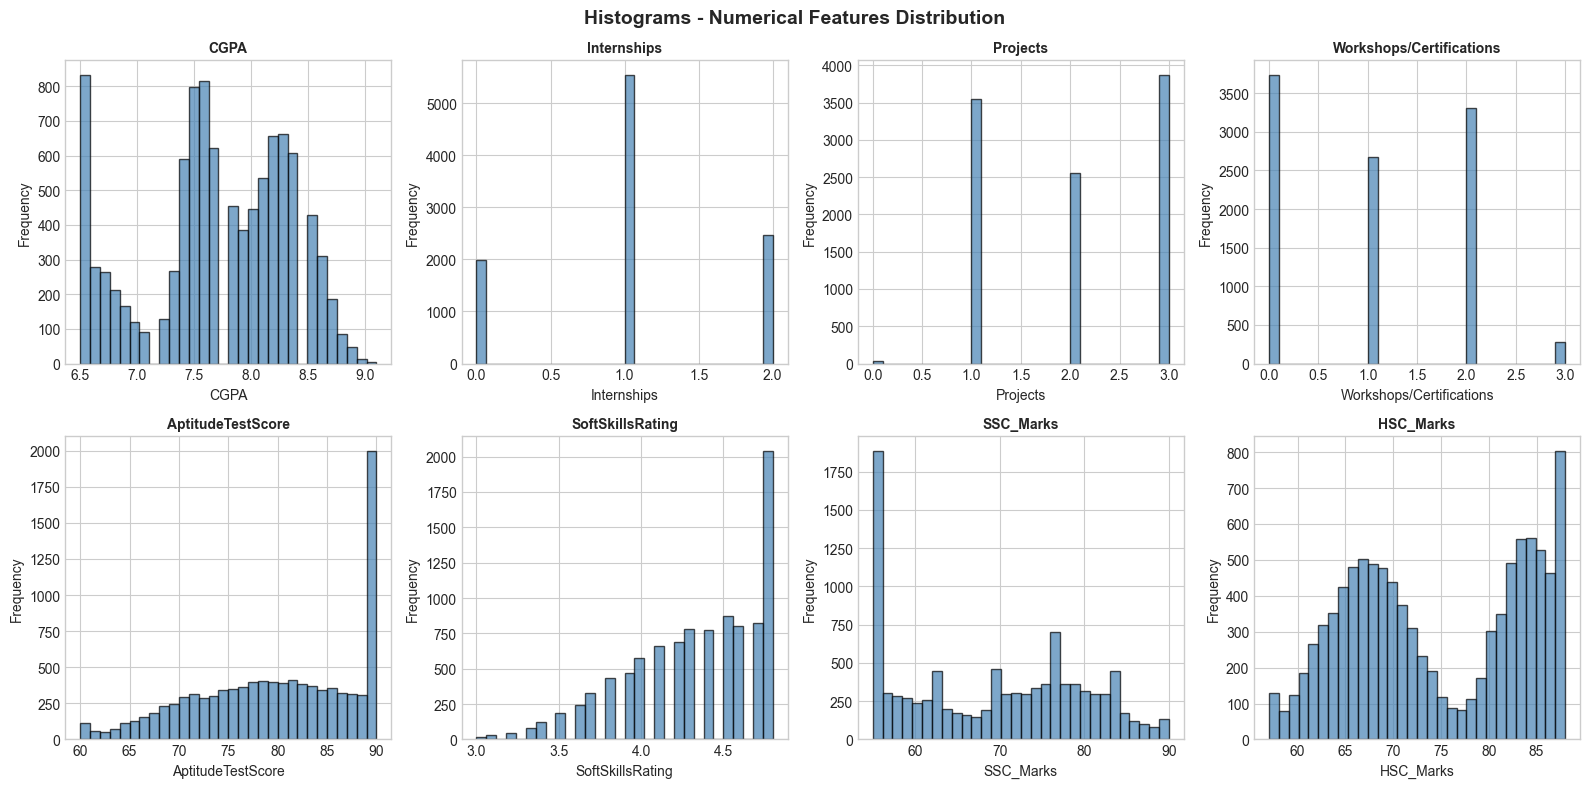

In [16]:
# Histogram plots for numerical features
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Histograms - Numerical Features Distribution', fontsize=14, fontweight='bold')

for idx, col in enumerate(num_features):
    row = idx // 4
    col_idx = idx % 4
    ax = axes[row, col_idx]
    ax.hist(df[col], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    ax.set_title(col, fontsize=10, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

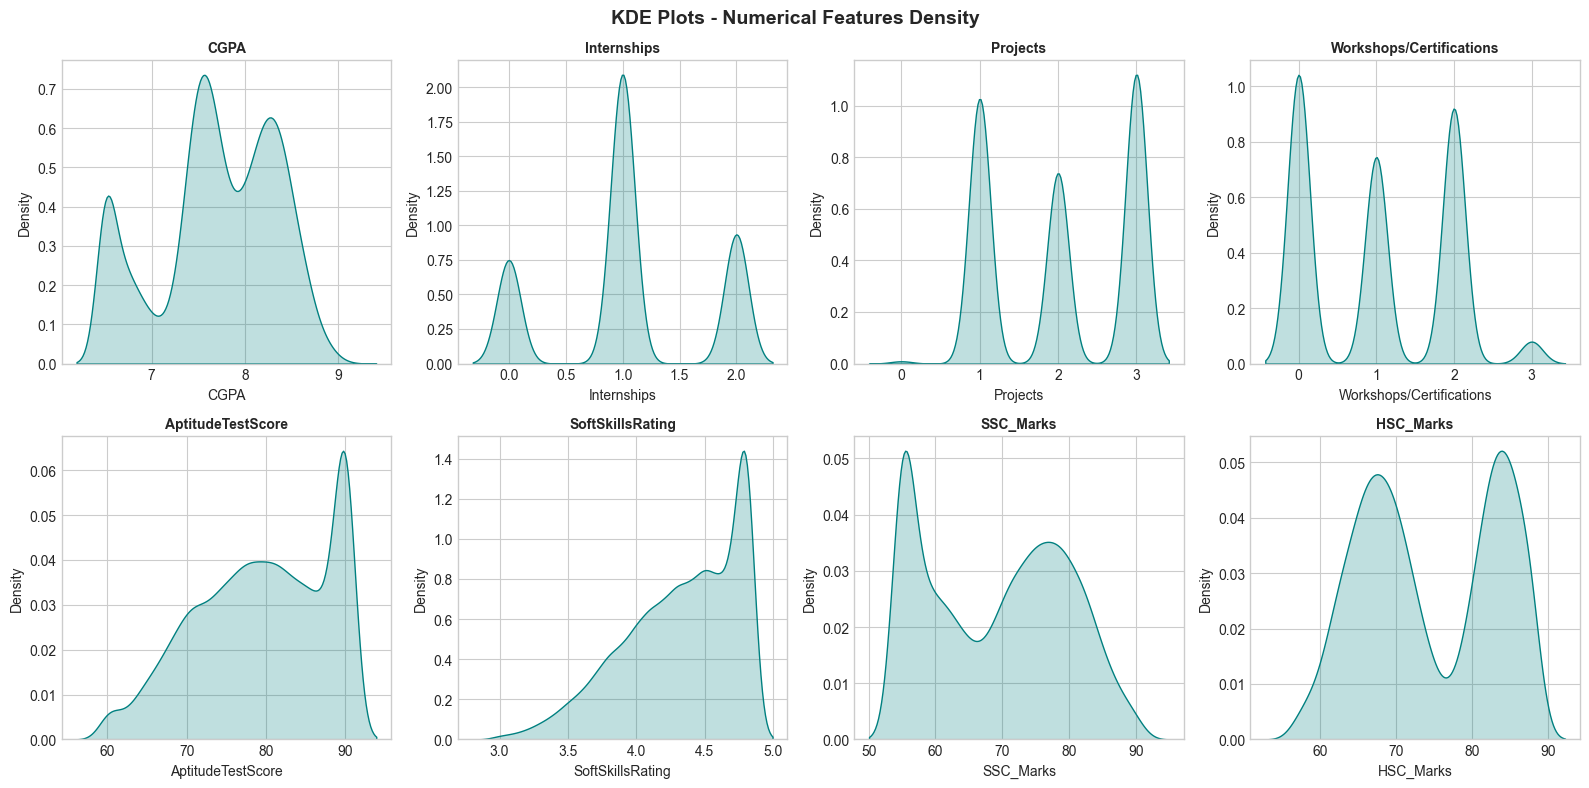

In [17]:
# KDE plots for numerical features
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('KDE Plots - Numerical Features Density', fontsize=14, fontweight='bold')

for idx, col in enumerate(num_features):
    row = idx // 4
    col_idx = idx % 4
    ax = axes[row, col_idx]
    sns.kdeplot(data=df, x=col, ax=ax, fill=True, color='teal')
    ax.set_title(col, fontsize=10, fontweight='bold')
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()

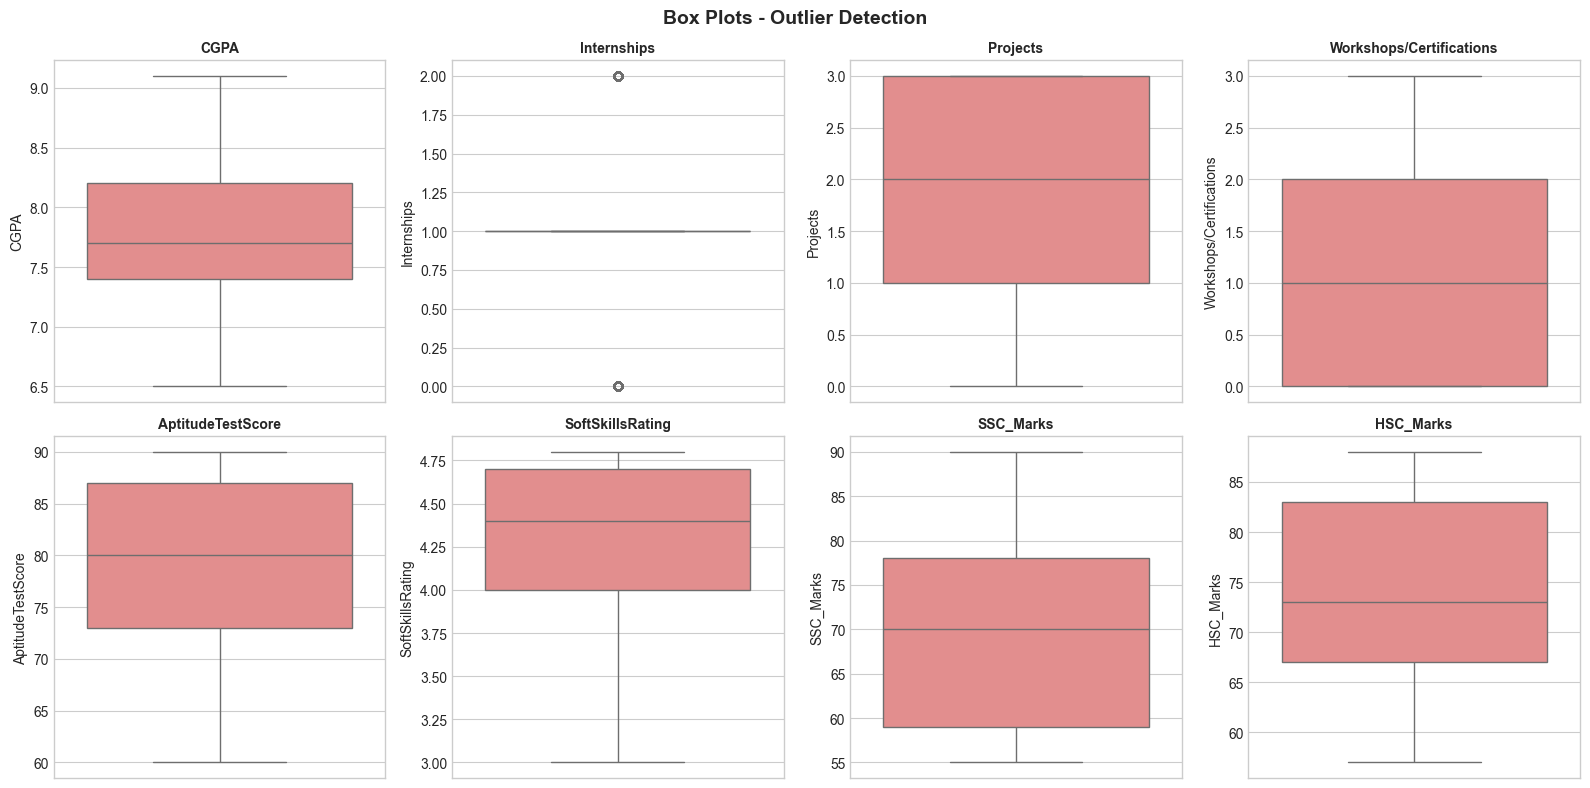

In [18]:
# Box plots for numerical features - outlier detection
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle('Box Plots - Outlier Detection', fontsize=14, fontweight='bold')

for idx, col in enumerate(num_features):
    row = idx // 4
    col_idx = idx % 4
    ax = axes[row, col_idx]
    sns.boxplot(data=df, y=col, ax=ax, color='lightcoral')
    ax.set_title(col, fontsize=10, fontweight='bold')
    ax.set_ylabel(col)

plt.tight_layout()
plt.show()

In [19]:
# Descriptive statistics for numerical features
print("Descriptive Statistics - Numerical Features:")
print("=" * 80)
df[num_features].describe().T

Descriptive Statistics - Numerical Features:


,count,mean,std,min,25%,50%,75%,max
CGPA,10000.0,7.69801,0.640131,6.5,7.4,7.7,8.2,9.1
Internships,10000.0,1.04920,0.665901,0.0,1.0,1.0,1.0,2.0
Projects,10000.0,2.02660,0.867968,0.0,1.0,2.0,3.0,3.0
Workshops/Certifications,10000.0,1.01320,0.904272,0.0,0.0,1.0,2.0,3.0
AptitudeTestScore,10000.0,79.44990,8.159997,60.0,73.0,80.0,87.0,90.0
SoftSkillsRating,10000.0,4.32396,0.411622,3.0,4.0,4.4,4.7,4.8
SSC_Marks,10000.0,69.15940,10.430459,55.0,59.0,70.0,78.0,90.0
HSC_Marks,10000.0,74.50150,8.919527,57.0,67.0,73.0,83.0,88.0


## 2.2 Univariate Analysis - Categorical Features

In [20]:
# Use categorical_cols from Phase 1
print(f"Categorical features for analysis: {categorical_cols}")

Categorical features for analysis: ['ExtracurricularActivities', 'PlacementTraining', 'PlacementStatus']


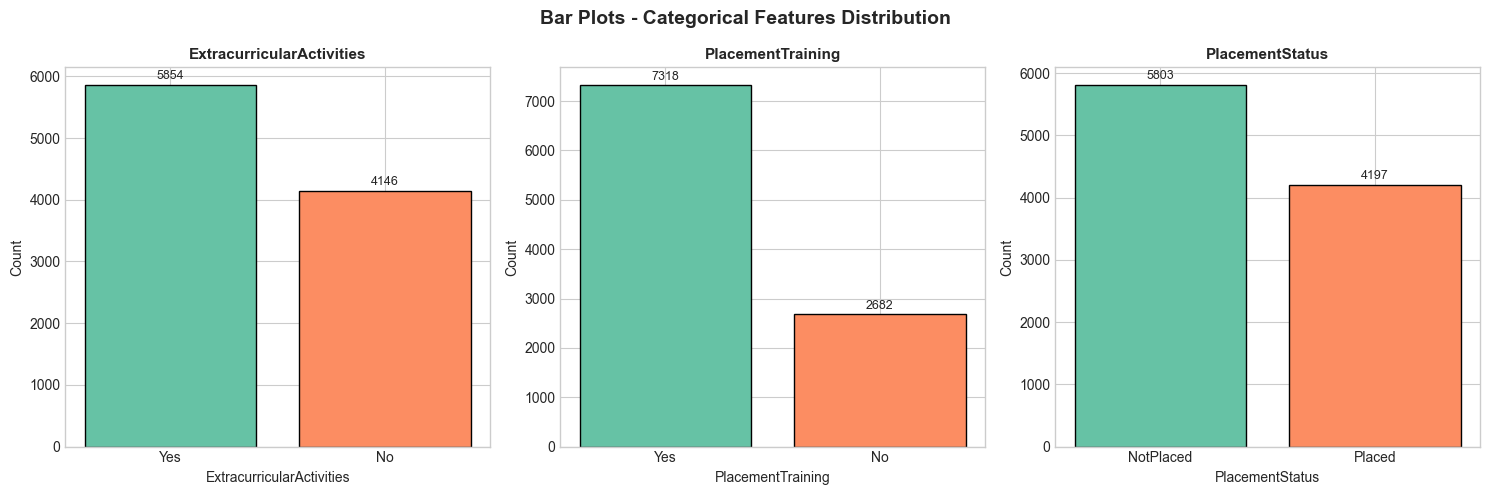

In [21]:
# Bar plots for categorical features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Bar Plots - Categorical Features Distribution', fontsize=14, fontweight='bold')

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]
    counts = df[col].value_counts()
    bars = ax.bar(counts.index, counts.values, color=sns.color_palette('Set2', len(counts)), edgecolor='black')
    ax.set_title(col, fontsize=11, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    
    for bar, count in zip(bars, counts.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
                str(count), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

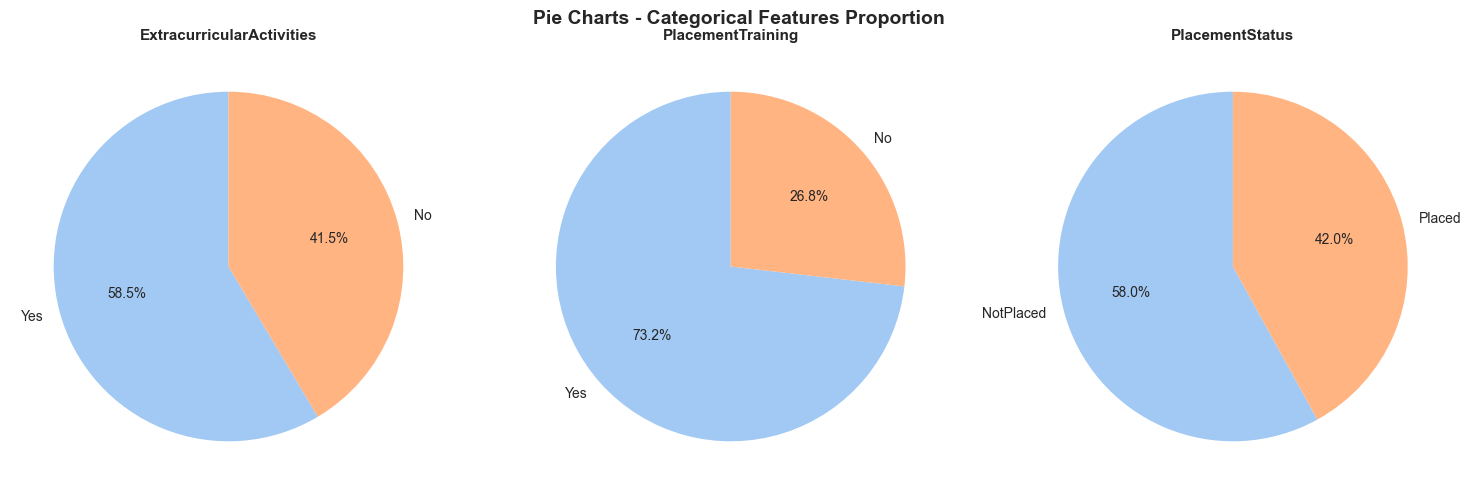

In [22]:
# Pie charts for categorical features
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Pie Charts - Categorical Features Proportion', fontsize=14, fontweight='bold')

for idx, col in enumerate(categorical_cols):
    ax = axes[idx]
    counts = df[col].value_counts()
    ax.pie(counts.values, labels=counts.index, autopct='%1.1f%%', 
           colors=sns.color_palette('pastel', len(counts)), startangle=90)
    ax.set_title(col, fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

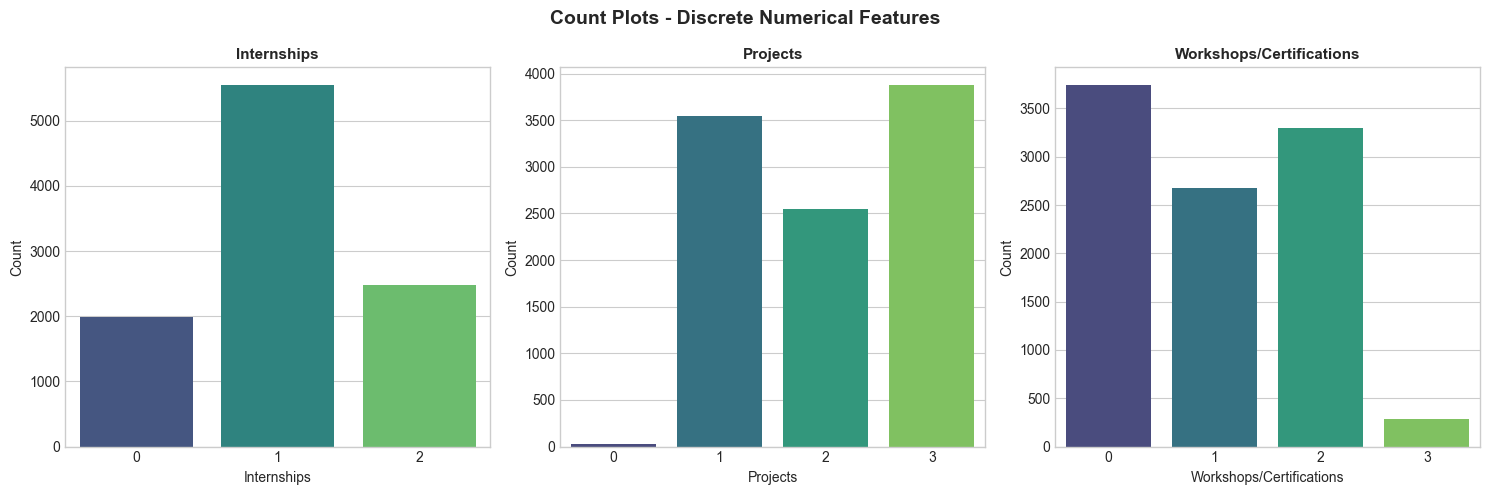

In [23]:
# Count plots for discrete numerical features (Internships, Projects, Workshops)
discrete_features = ['Internships', 'Projects', 'Workshops/Certifications']

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Count Plots - Discrete Numerical Features', fontsize=14, fontweight='bold')

for idx, col in enumerate(discrete_features):
    ax = axes[idx]
    sns.countplot(data=df, x=col, ax=ax, palette='viridis')
    ax.set_title(col, fontsize=11, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

## 2.3 Bivariate Analysis

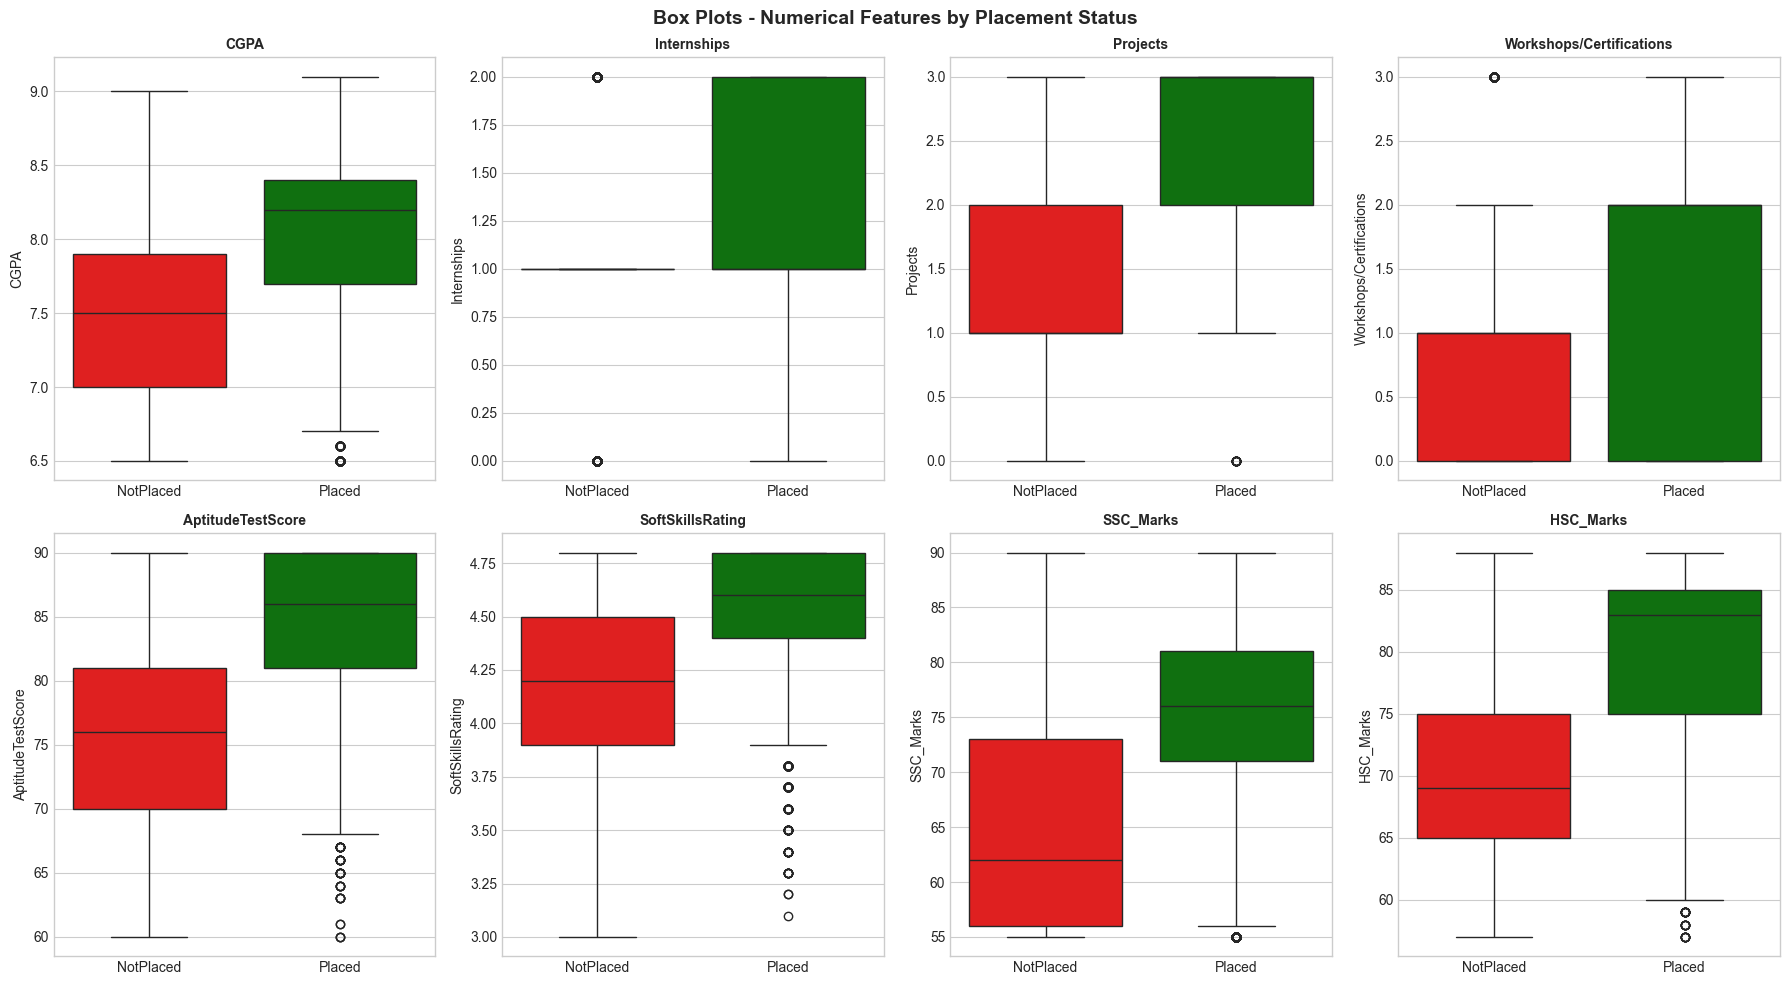

In [24]:
# Box plots - Numerical features by PlacementStatus
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle('Box Plots - Numerical Features by Placement Status', fontsize=14, fontweight='bold')

for idx, col in enumerate(num_features):
    row = idx // 4
    col_idx = idx % 4
    ax = axes[row, col_idx]
    sns.boxplot(data=df, x='PlacementStatus', y=col, ax=ax, 
                palette={'Placed': 'green', 'NotPlaced': 'red'})
    ax.set_title(col, fontsize=10, fontweight='bold')
    ax.set_xlabel('')

plt.tight_layout()
plt.show()

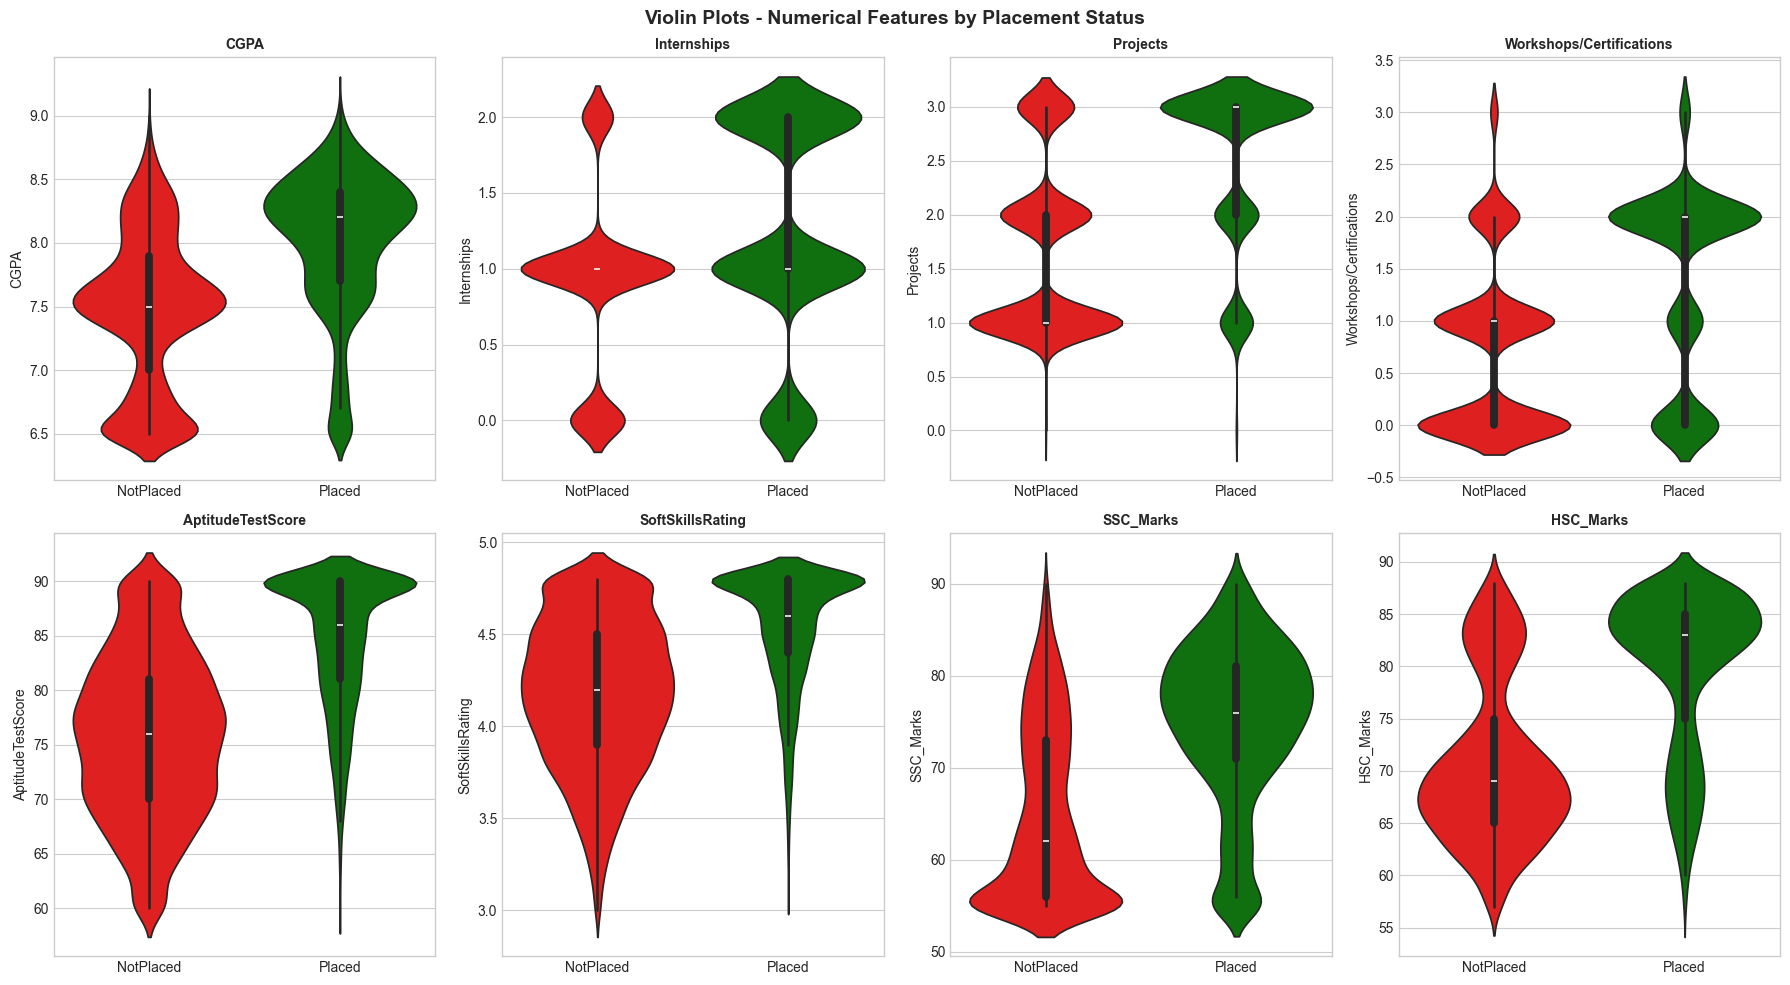

In [25]:
# Violin plots - Numerical features by PlacementStatus
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle('Violin Plots - Numerical Features by Placement Status', fontsize=14, fontweight='bold')

for idx, col in enumerate(num_features):
    row = idx // 4
    col_idx = idx % 4
    ax = axes[row, col_idx]
    sns.violinplot(data=df, x='PlacementStatus', y=col, ax=ax, 
                   palette={'Placed': 'green', 'NotPlaced': 'red'})
    ax.set_title(col, fontsize=10, fontweight='bold')
    ax.set_xlabel('')

plt.tight_layout()
plt.show()

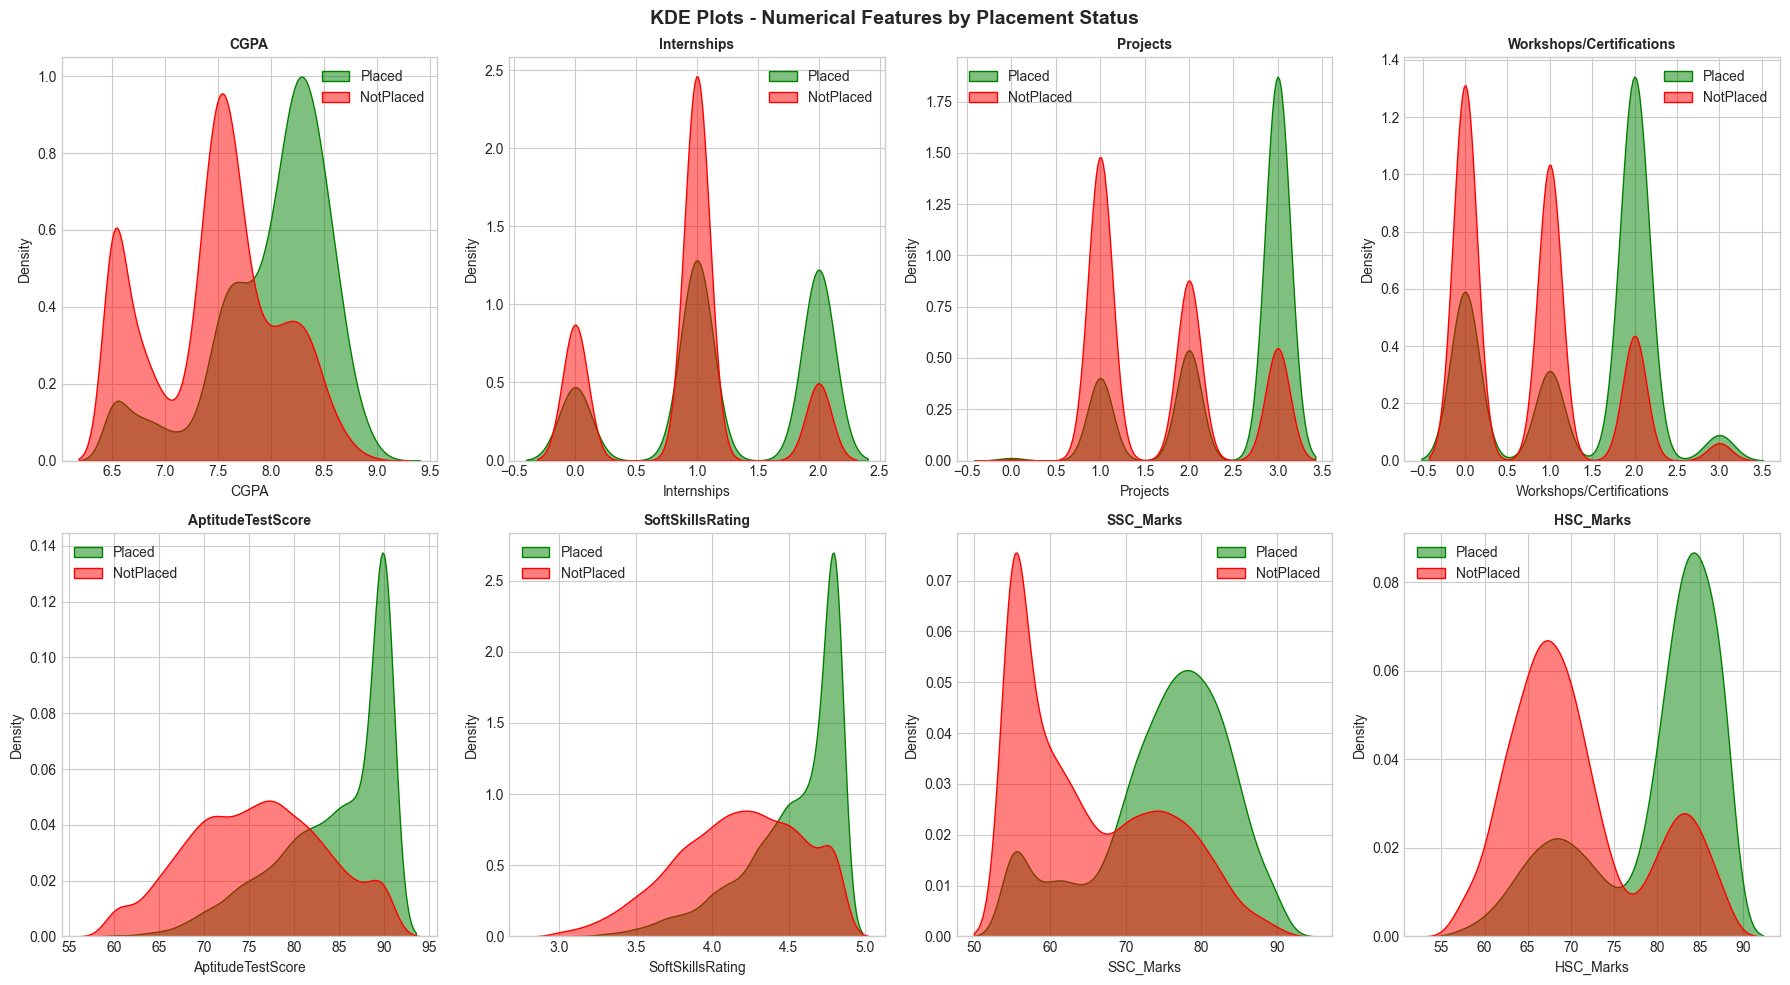

In [26]:
# KDE plots - Numerical features by PlacementStatus (overlaid)
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle('KDE Plots - Numerical Features by Placement Status', fontsize=14, fontweight='bold')

for idx, col in enumerate(num_features):
    row = idx // 4
    col_idx = idx % 4
    ax = axes[row, col_idx]
    
    for status, color in [('Placed', 'green'), ('NotPlaced', 'red')]:
        subset = df[df['PlacementStatus'] == status]
        sns.kdeplot(data=subset, x=col, ax=ax, fill=True, alpha=0.5, label=status, color=color)
    
    ax.set_title(col, fontsize=10, fontweight='bold')
    ax.legend()

plt.tight_layout()
plt.show()

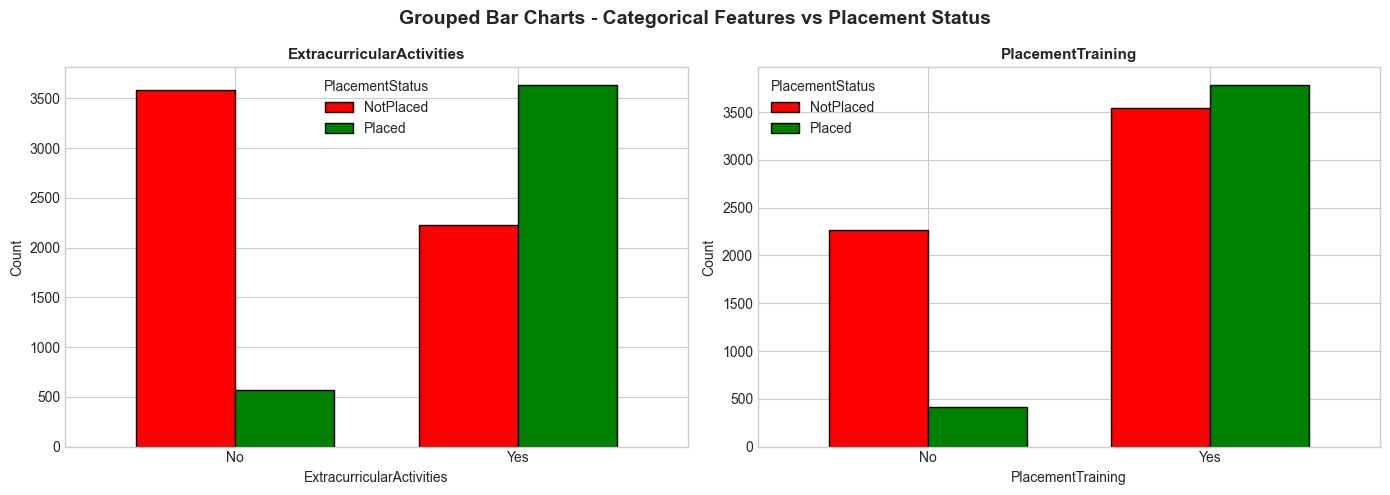

In [27]:
# Grouped bar charts - Categorical features vs PlacementStatus
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Grouped Bar Charts - Categorical Features vs Placement Status', fontsize=14, fontweight='bold')

cat_for_bivariate = ['ExtracurricularActivities', 'PlacementTraining']

for idx, col in enumerate(cat_for_bivariate):
    ax = axes[idx]
    ct = pd.crosstab(df[col], df['PlacementStatus'])
    ct.plot(kind='bar', ax=ax, color=['red', 'green'], edgecolor='black', width=0.7)
    ax.set_title(col, fontsize=11, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.legend(title='PlacementStatus')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

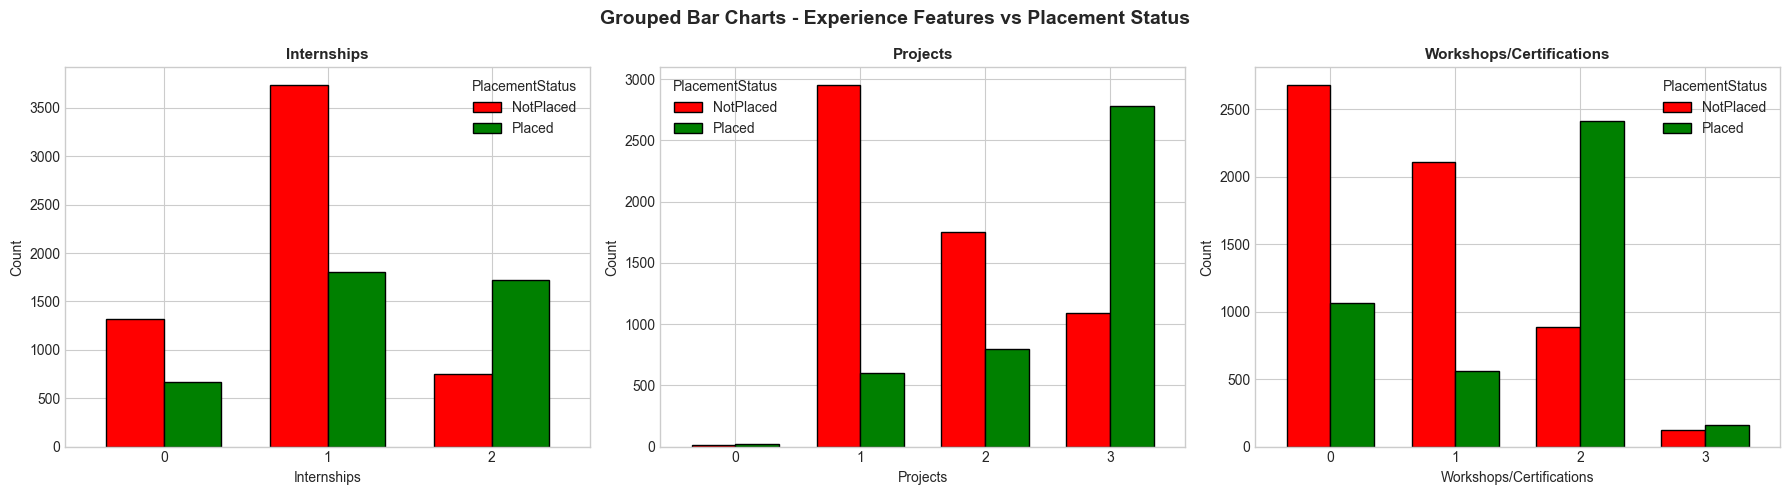

In [28]:
# Grouped bar charts - Discrete features vs PlacementStatus
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Grouped Bar Charts - Experience Features vs Placement Status', fontsize=14, fontweight='bold')

for idx, col in enumerate(discrete_features):
    ax = axes[idx]
    ct = pd.crosstab(df[col], df['PlacementStatus'])
    ct.plot(kind='bar', ax=ax, color=['red', 'green'], edgecolor='black', width=0.7)
    ax.set_title(col, fontsize=11, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    ax.legend(title='PlacementStatus')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

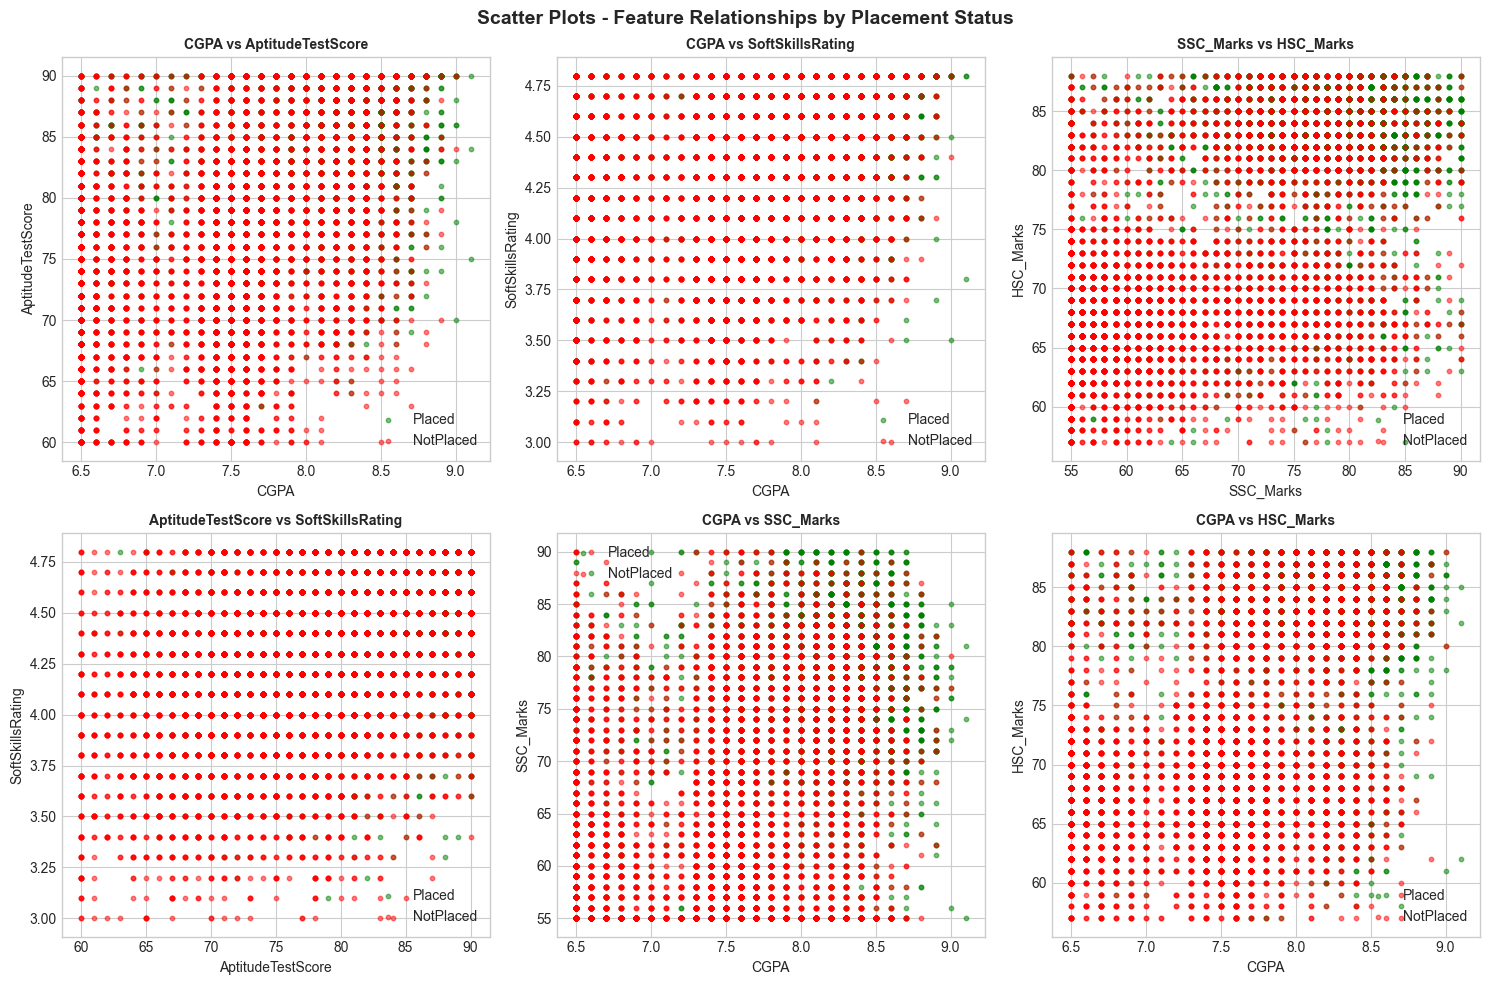

In [29]:
# Scatter plots - Key numerical feature pairs
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Scatter Plots - Feature Relationships by Placement Status', fontsize=14, fontweight='bold')

scatter_pairs = [
    ('CGPA', 'AptitudeTestScore'),
    ('CGPA', 'SoftSkillsRating'),
    ('SSC_Marks', 'HSC_Marks'),
    ('AptitudeTestScore', 'SoftSkillsRating'),
    ('CGPA', 'SSC_Marks'),
    ('CGPA', 'HSC_Marks')
]

for idx, (x_col, y_col) in enumerate(scatter_pairs):
    row = idx // 3
    col_idx = idx % 3
    ax = axes[row, col_idx]
    
    for status, color in [('Placed', 'green'), ('NotPlaced', 'red')]:
        subset = df[df['PlacementStatus'] == status]
        ax.scatter(subset[x_col], subset[y_col], c=color, label=status, alpha=0.5, s=10)
    
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f'{x_col} vs {y_col}', fontsize=10, fontweight='bold')
    ax.legend()

plt.tight_layout()
plt.show()

In [30]:
# Placement rate by categorical and discrete features
print("Placement Rate by Features:")
print("=" * 60)

analysis_features = discrete_features + cat_for_bivariate

for col in analysis_features:
    print(f"\n{col}:")
    placement_rate = df.groupby(col)['PlacementStatus'].apply(
        lambda x: (x == 'Placed').sum() / len(x) * 100
    ).round(2)
    for val, rate in placement_rate.items():
        print(f"   {val}: {rate}% placed")

Placement Rate by Features:

Internships:
   0: 33.43% placed
   1: 32.64% placed
   2: 69.7% placed

Projects:
   0: 60.0% placed
   1: 16.86% placed
   2: 31.37% placed
   3: 71.8% placed

Workshops/Certifications:
   0: 28.38% placed
   1: 21.05% placed
   2: 73.05% placed
   3: 56.34% placed

ExtracurricularActivities:
   No: 13.68% placed
   Yes: 62.01% placed

PlacementTraining:
   No: 15.59% placed
   Yes: 51.64% placed


## 2.4 Correlation Analysis

In [31]:
# Create encoded dataframe for correlation
df_encoded = df.copy()
df_encoded['PlacementStatus_Encoded'] = df_encoded['PlacementStatus'].map({'Placed': 1, 'NotPlaced': 0})
df_encoded['ExtracurricularActivities_Encoded'] = df_encoded['ExtracurricularActivities'].map({'Yes': 1, 'No': 0})
df_encoded['PlacementTraining_Encoded'] = df_encoded['PlacementTraining'].map({'Yes': 1, 'No': 0})

# Columns for correlation matrix
corr_columns = num_features + ['ExtracurricularActivities_Encoded', 'PlacementTraining_Encoded', 'PlacementStatus_Encoded']
correlation_matrix = df_encoded[corr_columns].corr()

print("Correlation Matrix:")
correlation_matrix

Correlation Matrix:


,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks,ExtracurricularActivities_Encoded,PlacementTraining_Encoded,PlacementStatus_Encoded
CGPA,1.000000,0.280601,0.435928,0.349686,0.461250,0.383547,0.404971,0.462313,0.444130,0.251628,0.423131
Internships,0.280601,1.000000,0.309196,0.279110,0.320725,0.273691,0.279837,0.317149,0.274960,0.153547,0.260340
Projects,0.435928,0.309196,1.000000,0.377865,0.540339,0.450294,0.499421,0.535708,0.491430,0.293709,0.475186
Workshops/Certifications,0.349686,0.279110,0.377865,1.000000,0.388061,0.342397,0.373045,0.418442,0.373926,0.180333,0.362268
AptitudeTestScore,0.461250,0.320725,0.540339,0.388061,1.000000,0.515400,0.513044,0.565105,0.474130,0.314772,0.521744
SoftSkillsRating,0.383547,0.273691,0.450294,0.342397,0.515400,1.000000,0.430734,0.466912,0.448049,0.235571,0.427284
SSC_Marks,0.404971,0.279837,0.499421,0.373045,0.513044,0.430734,1.000000,0.524916,0.517850,0.257440,0.469763
HSC_Marks,0.462313,0.317149,0.535708,0.418442,0.565105,0.466912,0.524916,1.000000,0.533572,0.325434,0.505746
ExtracurricularActivities_Encoded,0.444130,0.274960,0.491430,0.373926,0.474130,0.448049,0.517850,0.533572,1.000000,0.327158,0.482491
PlacementTraining_Encoded,0.251628,0.153547,0.293709,0.180333,0.314772,0.235571,0.257440,0.325434,0.327158,1.000000,0.323659


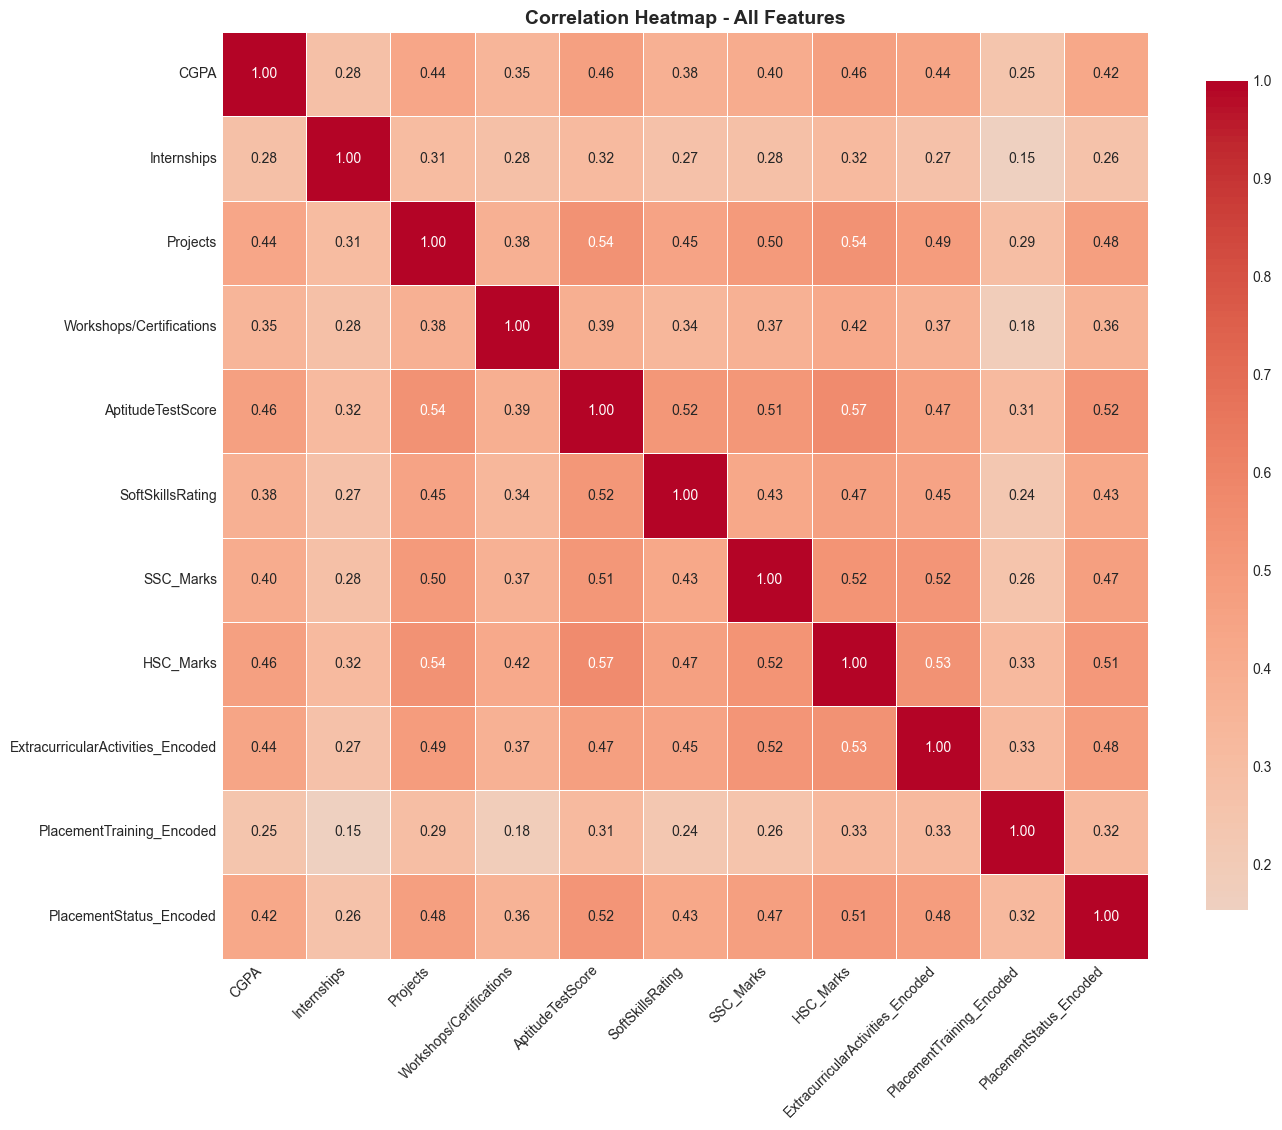

In [32]:
# Full correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={'shrink': 0.8})
plt.title('Correlation Heatmap - All Features', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

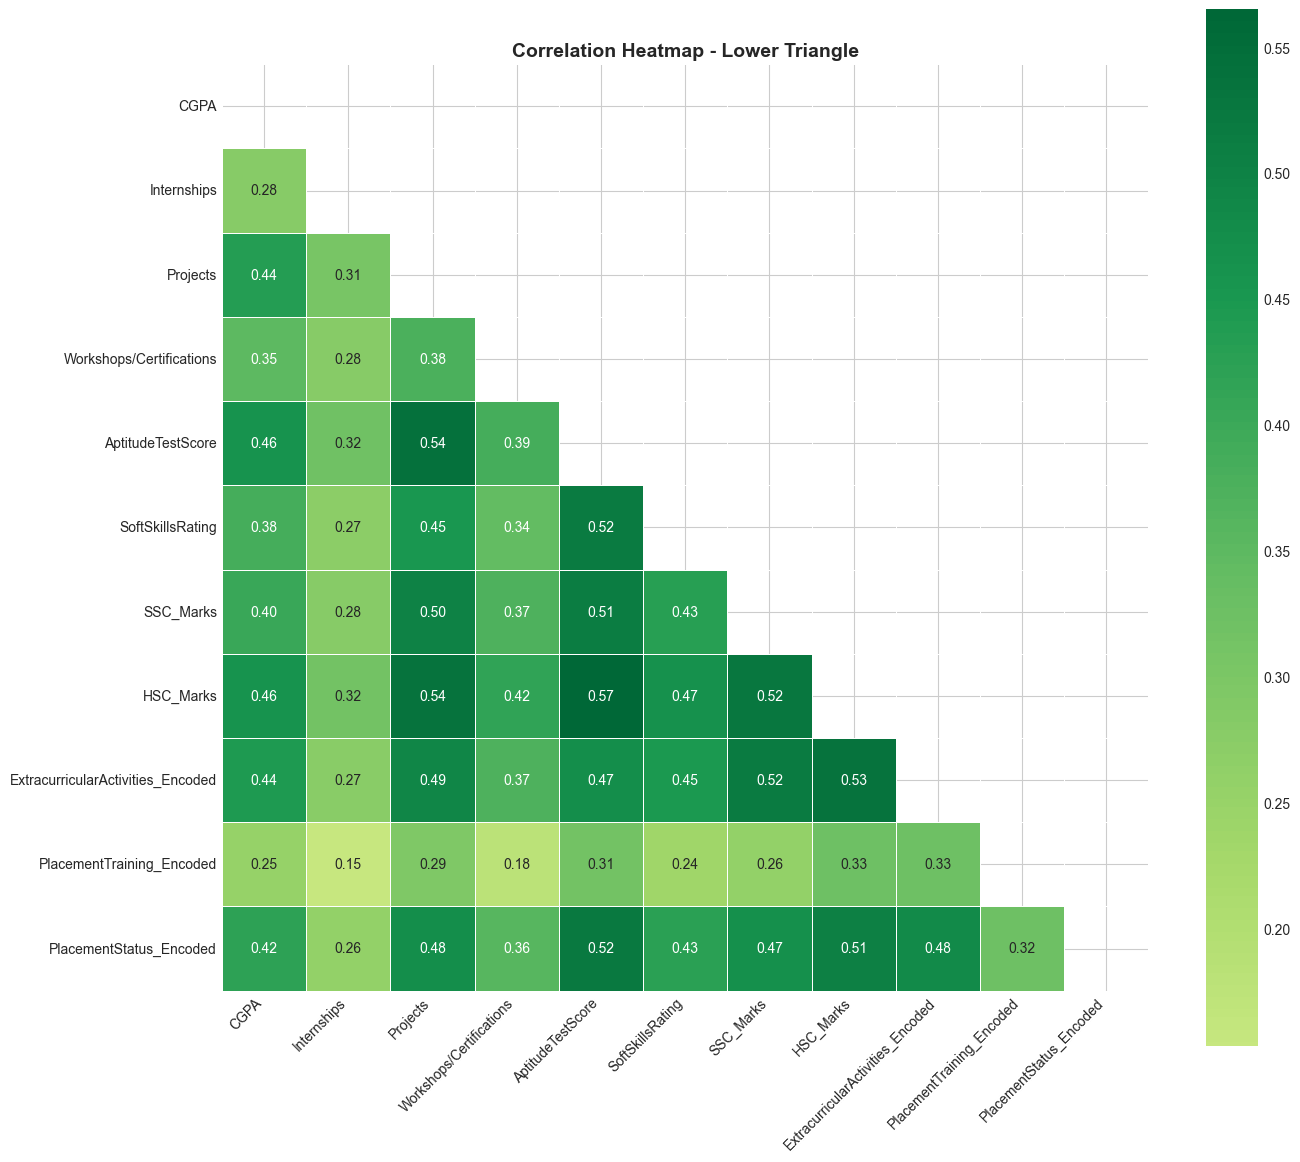

In [33]:
# Lower triangle heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='RdYlGn', 
            center=0, mask=mask, square=True, linewidths=0.5)
plt.title('Correlation Heatmap - Lower Triangle', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Feature Correlation with PlacementStatus:
AptitudeTestScore                    0.521744
HSC_Marks                            0.505746
ExtracurricularActivities_Encoded    0.482491
Projects                             0.475186
SSC_Marks                            0.469763
SoftSkillsRating                     0.427284
CGPA                                 0.423131
Workshops/Certifications             0.362268
PlacementTraining_Encoded            0.323659
Internships                          0.260340
Name: PlacementStatus_Encoded, dtype: float64


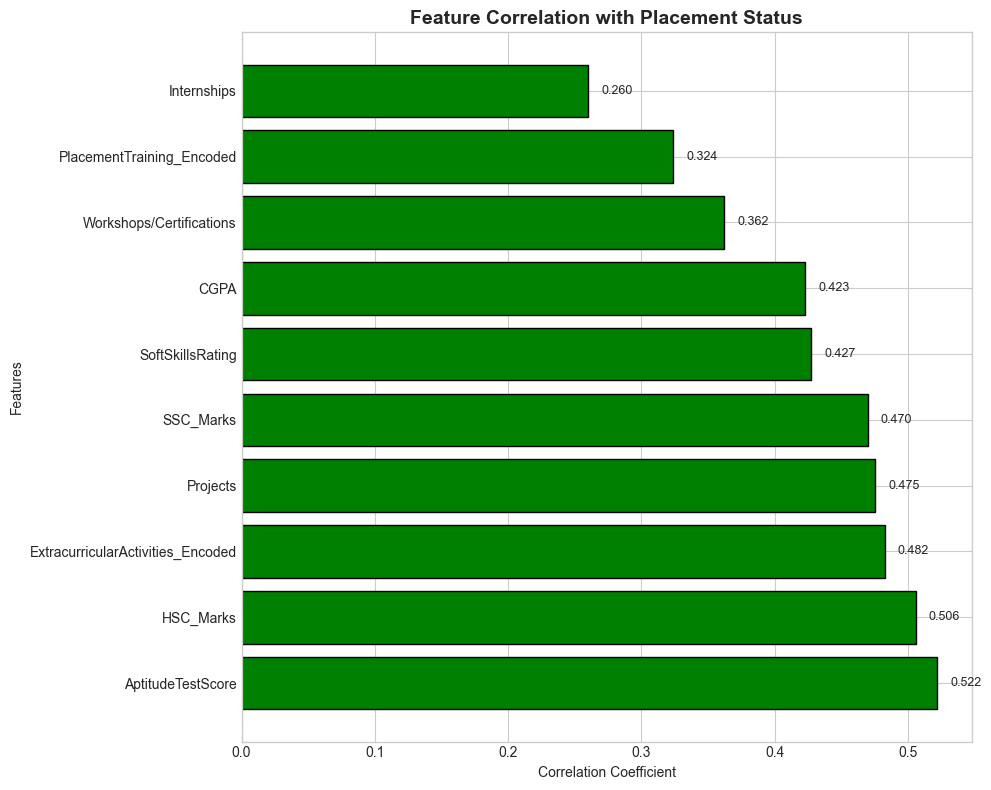

In [34]:
# Correlation with target variable
target_correlation = correlation_matrix['PlacementStatus_Encoded'].drop('PlacementStatus_Encoded').sort_values(ascending=False)

print("Feature Correlation with PlacementStatus:")
print("=" * 50)
print(target_correlation)

# Bar chart of correlation with target
plt.figure(figsize=(10, 8))
colors = ['green' if x > 0 else 'red' for x in target_correlation.values]
bars = plt.barh(target_correlation.index, target_correlation.values, color=colors, edgecolor='black')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.title('Feature Correlation with Placement Status', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)

for bar, val in zip(bars, target_correlation.values):
    x_pos = val + 0.01 if val > 0 else val - 0.05
    plt.text(x_pos, bar.get_y() + bar.get_height()/2, f'{val:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

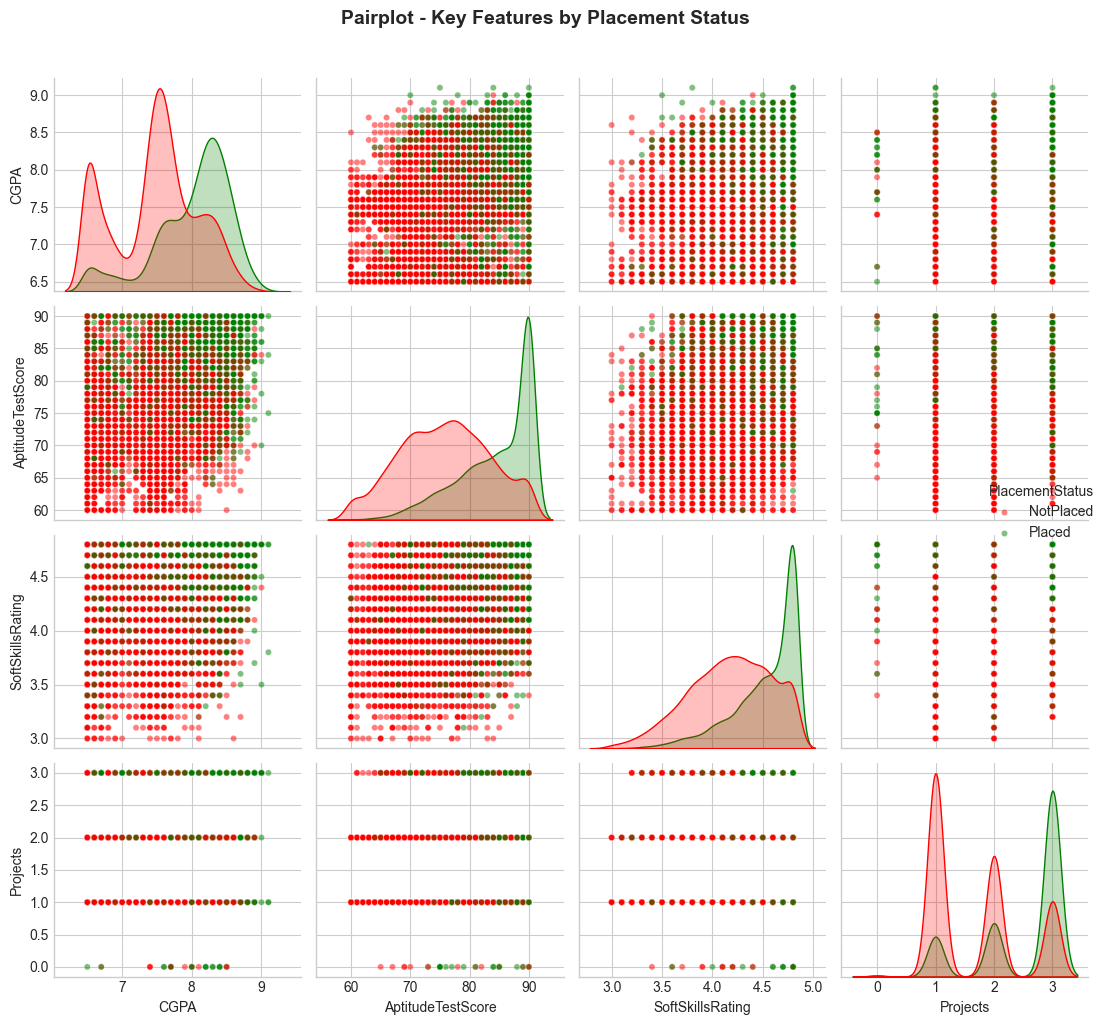

In [35]:
# Pairplot for key features
key_features_for_pairplot = ['CGPA', 'AptitudeTestScore', 'SoftSkillsRating', 'Projects', 'PlacementStatus']
sns.pairplot(df[key_features_for_pairplot], hue='PlacementStatus', 
             palette={'Placed': 'green', 'NotPlaced': 'red'}, 
             diag_kind='kde', plot_kws={'alpha': 0.5, 's': 20})
plt.suptitle('Pairplot - Key Features by Placement Status', y=1.02, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 2.5 Findings and Irregularities

In [36]:
# Summary statistics by placement status
print("Mean Values by Placement Status:")
print("=" * 80)

summary = df.groupby('PlacementStatus')[num_features].mean().T
summary['Difference'] = summary['Placed'] - summary['NotPlaced']
summary['Observation'] = summary['Difference'].apply(
    lambda x: 'Higher for Placed' if x > 0 else 'Higher for NotPlaced'
)
print(summary.round(3))

Mean Values by Placement Status:
PlacementStatus           NotPlaced  Placed  Difference        Observation
CGPA                          7.468   8.016       0.549  Higher for Placed
Internships                   0.902   1.253       0.351  Higher for Placed
Projects                      1.676   2.512       0.836  Higher for Placed
Workshops/Certifications      0.735   1.398       0.664  Higher for Placed
AptitudeTestScore            75.829  84.456       8.626  Higher for Placed
SoftSkillsRating              4.174   4.531       0.356  Higher for Placed
SSC_Marks                    64.993  74.921       9.928  Higher for Placed
HSC_Marks                    70.665  79.806       9.140  Higher for Placed


In [37]:
print("="*80)
print("EDA FINDINGS AND OBSERVATIONS")
print("="*80)

print("\n1. TARGET VARIABLE DISTRIBUTION:")
print("-"*40)
placed_count = (df['PlacementStatus'] == 'Placed').sum()
not_placed_count = (df['PlacementStatus'] == 'NotPlaced').sum()
print(f"   Placed: {placed_count} ({placed_count/len(df)*100:.1f}%)")
print(f"   NotPlaced: {not_placed_count} ({not_placed_count/len(df)*100:.1f}%)")
print(f"   Class Ratio: {min(placed_count, not_placed_count)/max(placed_count, not_placed_count):.2f}")

print("\n2. KEY POSITIVE CORRELATIONS WITH PLACEMENT:")
print("-"*40)
for feature, corr in target_correlation.head(5).items():
    print(f"   {feature}: {corr:.4f}")

print("\n3. FEATURE OBSERVATIONS:")
print("-"*40)
print("   - CGPA: Placed students have higher average CGPA")
print("   - AptitudeTestScore: Strong positive correlation with placement")
print("   - Projects: More projects correlate with higher placement rate")
print("   - Internships: Students with more internships have better placement outcomes")
print("   - PlacementTraining: Students with training have higher placement rate")
print("   - ExtracurricularActivities: Participation positively impacts placement")

print("\n4. IRREGULARITIES AND NOTES:")
print("-"*40)
print("   - No missing values detected in the dataset")
print("   - No duplicate records found")
print("   - SSC_Marks and HSC_Marks show weak correlation with placement")
print("   - Workshops/Certifications has relatively low impact on placement")
print("   - Some overlap exists between Placed and NotPlaced distributions")

print("\n5. RECOMMENDATIONS FOR MODELING:")
print("-"*40)
print("   - Focus on high-correlation features: CGPA, AptitudeTestScore, Projects")
print("   - Consider feature engineering for combined skill metrics")
print("   - Class distribution is reasonable, no major imbalance treatment needed")
print("   - StandardScaler recommended for numerical features")

print("\n" + "="*80)
print("END OF PHASE 2 - EDA COMPLETE")
print("="*80)

EDA FINDINGS AND OBSERVATIONS

1. TARGET VARIABLE DISTRIBUTION:
----------------------------------------
   Placed: 4197 (42.0%)
   NotPlaced: 5803 (58.0%)
   Class Ratio: 0.72

2. KEY POSITIVE CORRELATIONS WITH PLACEMENT:
----------------------------------------
   AptitudeTestScore: 0.5217
   HSC_Marks: 0.5057
   ExtracurricularActivities_Encoded: 0.4825
   Projects: 0.4752
   SSC_Marks: 0.4698

3. FEATURE OBSERVATIONS:
----------------------------------------
   - CGPA: Placed students have higher average CGPA
   - AptitudeTestScore: Strong positive correlation with placement
   - Projects: More projects correlate with higher placement rate
   - Internships: Students with more internships have better placement outcomes
   - PlacementTraining: Students with training have higher placement rate
   - ExtracurricularActivities: Participation positively impacts placement

4. IRREGULARITIES AND NOTES:
----------------------------------------
   - No missing values detected in the dataset
 

# Phase 3: Data Preprocessing

In this phase, we will:
- Encode categorical variables
- Define features and target
- Split data into train and test sets

## 3.1 Import Preprocessing Libraries

In [38]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

print("Preprocessing libraries imported.")

Preprocessing libraries imported.


## 3.2 Prepare Data

In [39]:
# Drop StudentID
df = df.drop("StudentID", axis=1)
print(f"Dataframe shape: {df.shape}")

Dataframe shape: (10000, 11)


## 3.3 Encode Categorical Variables

In [40]:
label_encoders = {}
categorical_columns = ["ExtracurricularActivities", "PlacementTraining", "PlacementStatus"]

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

ExtracurricularActivities: {'No': np.int64(0), 'Yes': np.int64(1)}
PlacementTraining: {'No': np.int64(0), 'Yes': np.int64(1)}
PlacementStatus: {'NotPlaced': np.int64(0), 'Placed': np.int64(1)}


## 3.4 Define Features and Target

In [41]:
X = df.drop("PlacementStatus", axis=1)
y = df["PlacementStatus"]

print(f"Features: {X.shape[1]}")
print(f"Samples: {X.shape[0]}")

Features: 10
Samples: 10000


## 3.5 Train-Test Split

In [42]:
# 80-20 stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Training samples: 8000
Testing samples: 2000


# Phase 4: Model Training and Evaluation

Approach:
- Cross-validation on training set for model comparison
- Final evaluation on held-out test set

## 4.1 Import Models

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

print("Models imported.")

Models imported.


## 4.2 Define Models

In [44]:
models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(random_state=42, max_iter=1000))
    ]),
    "Decision Tree": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", DecisionTreeClassifier(random_state=42))
    ]),
    "Random Forest": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", RandomForestClassifier(random_state=42, n_estimators=100))
    ]),
    "Gradient Boosting": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", GradientBoostingClassifier(random_state=42, n_estimators=100))
    ]),
    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(random_state=42))
    ]),
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=5))
    ])
}

print(f"Models: {list(models.keys())}")

Models: ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM', 'KNN']


## 4.3 Cross-Validation on Training Set

In [45]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = []

print("Cross-Validation Results (Training Set):")
print("="*60)

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="accuracy")
    cv_results.append({
        "Model": name,
        "CV Mean": scores.mean(),
        "CV Std": scores.std()
    })
    print(f"{name}: {scores.mean():.4f} (+/- {scores.std():.4f})")

cv_df = pd.DataFrame(cv_results).sort_values("CV Mean", ascending=False)
print("\nCV Rankings:")
cv_df

Cross-Validation Results (Training Set):
Logistic Regression: 0.7971 (+/- 0.0172)
Decision Tree: 0.7112 (+/- 0.0126)
Random Forest: 0.7883 (+/- 0.0090)
Gradient Boosting: 0.7966 (+/- 0.0168)
SVM: 0.7939 (+/- 0.0169)
KNN: 0.7770 (+/- 0.0077)

CV Rankings:


,Model,CV Mean,CV Std
0,Logistic Regression,0.797125,0.017215
3,Gradient Boosting,0.796625,0.016820
4,SVM,0.793875,0.016870
2,Random Forest,0.788250,0.009026
5,KNN,0.777000,0.007699
1,Decision Tree,0.711250,0.012593


## 4.4 Train Models and Evaluate on Test Set

In [46]:
test_results = []

print("Test Set Evaluation:")
print("="*80)

for name, model in models.items():
    # Train on full training set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    test_results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1
    })
    
    print(f"{name}:")
    print(f"   Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")

print("="*80)

Test Set Evaluation:
Logistic Regression:
   Accuracy: 0.8085 | Precision: 0.7695 | Recall: 0.7759 | F1: 0.7727
Decision Tree:
   Accuracy: 0.7245 | Precision: 0.6735 | Recall: 0.6663 | F1: 0.6699
Random Forest:
   Accuracy: 0.7855 | Precision: 0.7556 | Recall: 0.7223 | F1: 0.7386
Gradient Boosting:
   Accuracy: 0.8030 | Precision: 0.7684 | Recall: 0.7592 | F1: 0.7638
SVM:
   Accuracy: 0.7990 | Precision: 0.7668 | Recall: 0.7485 | F1: 0.7575
KNN:
   Accuracy: 0.7780 | Precision: 0.7411 | Recall: 0.7235 | F1: 0.7322


## 4.5 Results Comparison

In [47]:
results_df = pd.DataFrame(test_results).sort_values("Accuracy", ascending=False).reset_index(drop=True)
print("Model Performance on Test Set:")
results_df

Model Performance on Test Set:


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.8085,0.769504,0.775924,0.772700
1,Gradient Boosting,0.8030,0.768396,0.759237,0.763789
2,SVM,0.7990,0.766789,0.748510,0.757539
3,Random Forest,0.7855,0.755611,0.722288,0.738574
4,KNN,0.7780,0.741148,0.723480,0.732207
5,Decision Tree,0.7245,0.673494,0.666269,0.669862


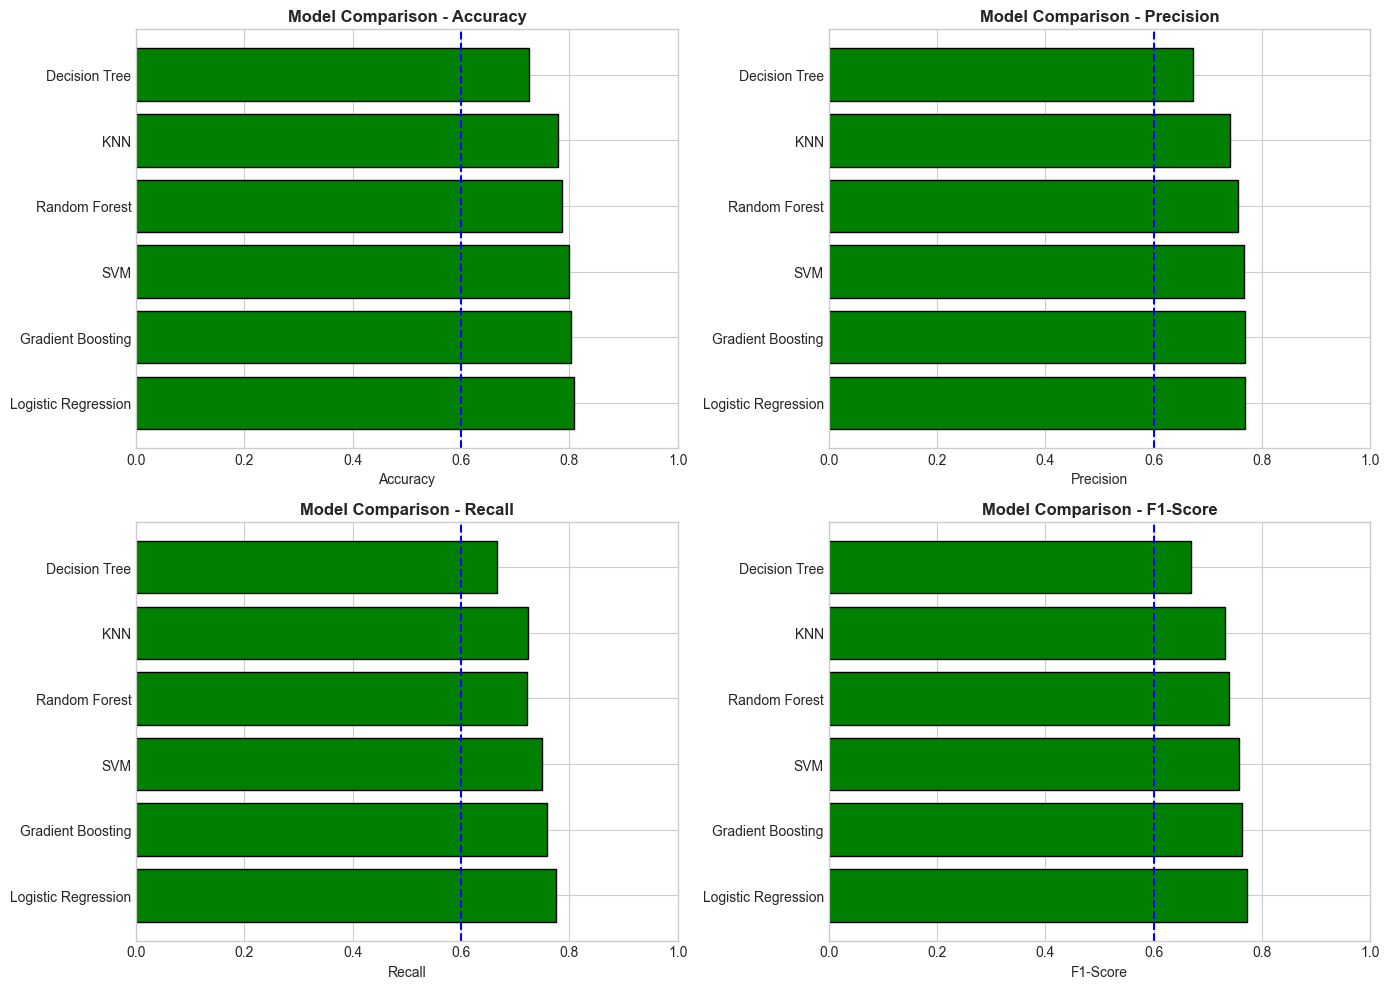

In [48]:
# Visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    colors = ["green" if v >= 0.6 else "red" for v in results_df[metric]]
    ax.barh(results_df["Model"], results_df[metric], color=colors, edgecolor="black")
    ax.set_xlabel(metric)
    ax.set_title(f"Model Comparison - {metric}", fontweight="bold")
    ax.axvline(x=0.6, color="blue", linestyle="--", label="Target 60%")
    ax.set_xlim(0, 1)

plt.tight_layout()
plt.show()

## 4.6 Best Model Detailed Evaluation

In [49]:
best_model_name = results_df.iloc[0]["Model"]
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

print(f"Best Model: {best_model_name}")
print("="*60)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best, target_names=["NotPlaced", "Placed"]))

Best Model: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

   NotPlaced       0.84      0.83      0.83      1161
      Placed       0.77      0.78      0.77       839

    accuracy                           0.81      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.81      0.81      0.81      2000



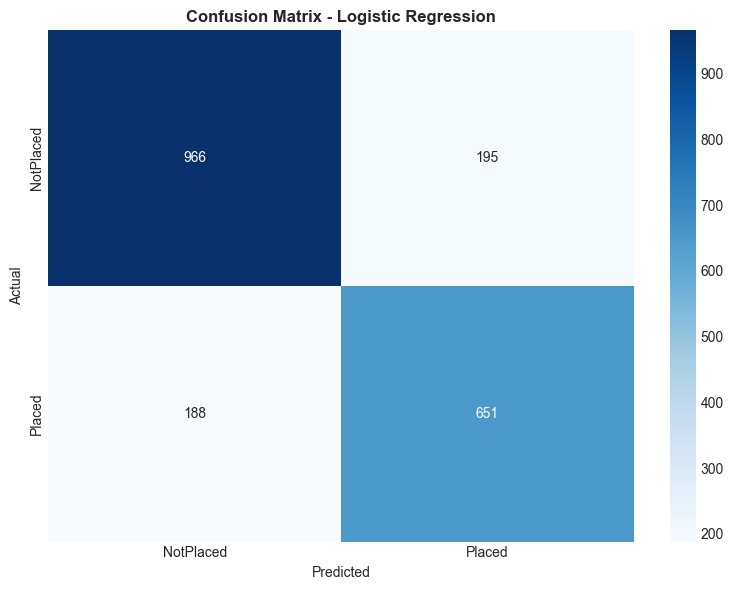

In [50]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["NotPlaced", "Placed"],
            yticklabels=["NotPlaced", "Placed"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - {best_model_name}", fontweight="bold")
plt.tight_layout()
plt.show()

# Phase 5: Conclusion

In [51]:
print("="*80)
print("PROJECT CONCLUSION")
print("="*80)

best_acc = results_df.iloc[0]["Accuracy"]
best_prec = results_df.iloc[0]["Precision"]
best_rec = results_df.iloc[0]["Recall"]
best_f1 = results_df.iloc[0]["F1-Score"]

print(f"\nBest Model: {best_model_name}")
print(f"   Accuracy:  {best_acc:.4f} ({best_acc*100:.2f}%)")
print(f"   Precision: {best_prec:.4f}")
print(f"   Recall:    {best_rec:.4f}")
print(f"   F1-Score:  {best_f1:.4f}")

print("\nSuccess Criteria: Accuracy > 60%")
if best_acc >= 0.6:
    print(f"   ACHIEVED")
else:
    print(f"   NOT ACHIEVED")

print("\nModel Rankings:")
for idx, row in results_df.iterrows():
    print(f"   {idx+1}. {row['Model']}: Acc={row['Accuracy']:.2%}, F1={row['F1-Score']:.4f}")

print("="*80)

PROJECT CONCLUSION

Best Model: Logistic Regression
   Accuracy:  0.8085 (80.85%)
   Precision: 0.7695
   Recall:    0.7759
   F1-Score:  0.7727

Success Criteria: Accuracy > 60%
   ACHIEVED

Model Rankings:
   1. Logistic Regression: Acc=80.85%, F1=0.7727
   2. Gradient Boosting: Acc=80.30%, F1=0.7638
   3. SVM: Acc=79.90%, F1=0.7575
   4. Random Forest: Acc=78.55%, F1=0.7386
   5. KNN: Acc=77.80%, F1=0.7322
   6. Decision Tree: Acc=72.45%, F1=0.6699
